In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
insurance = pd.read_csv(r"C:\Users\Shaik Shameer\Desktop\datasets\Swedish_Auto_Insurance.csv")

In [16]:
insurance

,claims,payment for claims
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


In [17]:
insurance.head()

,claims,payment for claims
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [18]:
insurance.tail()

,claims,payment for claims
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6
62,26,187.5


In [21]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
claims                63 non-null int64
payment for claims    63 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [22]:
insurance.describe()

,claims,payment for claims
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


In [26]:
insurance.isnull().sum()

claims                0
payment for claims    0
dtype: int64

In [92]:
x = insurance[["claims"]]
y = insurance["payment for claims"]

In [93]:
x.head()

,claims
0,108
1,19
2,13
3,124
4,40


In [94]:
y.head()

0    392.5
1     46.2
2     15.7
3    422.2
4    119.4
Name: payment for claims, dtype: float64

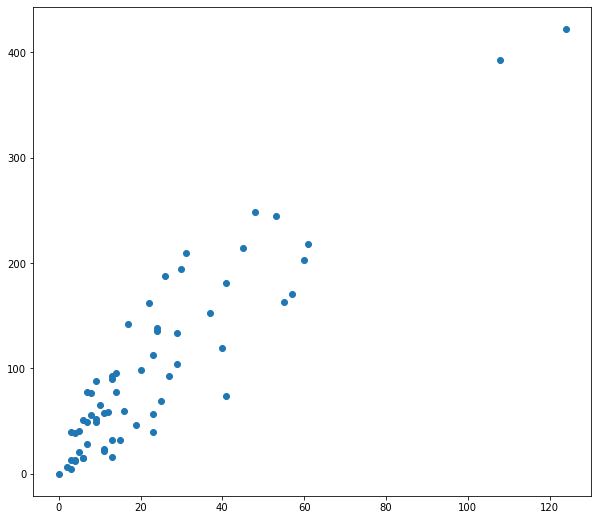

In [95]:
plt.figure(figsize=(10,9))
plt.scatter(x,y)
plt.show()

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y)

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
model = LinearRegression()

In [100]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
X_train.shape , X_test.shape , Y_test.shape , Y_train.shape

((47, 1), (16, 1), (16,), (47,))

In [102]:
model.coef_

array([3.46976381])

In [103]:
model.intercept_

15.990721511564374

In [104]:
model.score(X_train,Y_train)

0.8110457130251225

In [105]:
model.score(X_test,Y_test)

0.8404270027681808

In [106]:
y_pred = model.predict(X_test)

In [107]:
y_pred

array([109.6743443 ,  40.27906816,  74.97670623, 154.78127379,
        29.86977674, 199.88820328, 213.76725851, 144.37198237,
        54.15812339, 116.61387191, 446.24143357, 123.55339953,
        95.79528907, 106.20458049,  33.33954055,  29.86977674])

In [108]:
swedish = pd.DataFrame({"Actual_value":Y_test,
                       "Predicted_value":y_pred})

In [109]:
swedish

,Actual_value,Predicted_value
47,92.6,109.674344
28,27.9,40.279068
50,142.1,74.976706
4,119.4,154.781274
38,12.6,29.869777
61,244.6,199.888203
5,170.9,213.767259
43,152.8,144.371982
35,57.2,54.158123
55,133.3,116.613872


In [110]:
from sklearn import metrics

In [114]:
print("Mean Squared error",metrics.mean_squared_error(Y_test,y_pred))

Mean Squared error 1614.983844464615


In [112]:
print("Mean Absolute error",metrics.mean_absolute_error(Y_test,y_pred))

Mean Absolute error 30.90129766281894


In [113]:
print("Root Mean Squared error",np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

Root Mean Squared error 40.18686159013434


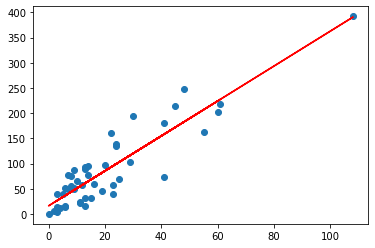

In [116]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,model.predict(X_train),color='red')